# Sonar Classification (Rocks vs Mines)

## Introduction

The objective of the Connectionist Bench (Sonar, Mines vs. Rocks) dataset is to train a network to distinguish between sonar signals that bounce off roughly cylindrical rocks and those that bounce off of a metal cylinder. So, given a new observation, is it a rock or a mine? How accurate is that prediction? Signals from a wide range of aspect angles are included in the dataset. There are 60 numbers in the range of 0.0 to 1.0 for each pattern, which indicate the energy integrated over a specific time interval within a given frequency band. Each record contains the letter "M" if it is a mine or "R" if the object is a rock. 


## Preliminary Exploratory Data Analysis

In [1]:
# First, we need to load all necessary R packages using the library function

library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
# We need to set our own set.seed function in order for our results to be reproducible

set.seed(1)

In [3]:
# Then, we need to read the data from a URL using appropriate read_* and assign it to a variable
# The dataset was downloaded from: "https://www.kaggle.com/datasets/armanakbari/connectionist-bench-sonar-mines-vs-rocks"

sonar_url <- "https://raw.githubusercontent.com/DannyPirouz/DSCI_100_Project/main/sonar.all-data.csv"
sonar_data <- read_csv(sonar_url)

Rows: 208 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Label
dbl (60): Freq_1, Freq_2, Freq_3, Freq_4, Freq_5, Freq_6, Freq_7, Freq_8, Fr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Check to see if we have missing data

sum(is.na(sonar_data))

[1] 0

In [5]:
# Next, we need to convert the column "Label" to a factor type and change the name of the labels to improve readability

sonar_data <- sonar_data |>
              mutate(Label = as.factor(Label)) |>
              mutate(Label = fct_recode(Label, "Rock" = "R", "Mine" = "M"))
sonar_data

Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,⋯,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,⋯,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,⋯,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,⋯,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,⋯,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,Rock
0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,⋯,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,Rock
0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,⋯,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,Rock
0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,⋯,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,Rock


In [6]:
# Now, we want to see how many "Rocks" and "Mines" we have in our entire data set

count_table <- sonar_data |> 
               group_by(Label) |>
               summarize(Count = n()) |>
               mutate(Percentage = 100*Count/nrow(sonar_data))
count_table

Label,Count,Percentage
<fct>,<int>,<dbl>
Mine,111,53.36538
Rock,97,46.63462


In [7]:
# We need to split the data into the training portion and the testing portion 
# The initial_split function will create randomness for us 

sonar_split <- initial_split(sonar_data, prop = 0.75, strata = Label)
sonar_train <- training(sonar_split)
sonar_test <- testing(sonar_split)

sonar_train

Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,⋯,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,⋯,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,Mine
0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,⋯,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,Mine
0.0587,0.1210,0.1268,0.1498,0.1436,0.0561,0.0832,0.0672,0.1372,0.2352,⋯,0.0331,0.0111,0.0088,0.0158,0.0122,0.0038,0.0101,0.0228,0.0124,Mine
0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,⋯,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,Mine
0.0428,0.0555,0.0708,0.0618,0.1215,0.1524,0.1543,0.0391,0.0610,0.0113,⋯,0.0142,0.0179,0.0079,0.0060,0.0131,0.0089,0.0084,0.0113,0.0049,Mine
0.0264,0.0071,0.0342,0.0793,0.1043,0.0783,0.1417,0.1176,0.0453,0.0945,⋯,0.0214,0.0262,0.0177,0.0037,0.0068,0.0121,0.0077,0.0078,0.0066,Mine
0.0210,0.0121,0.0203,0.1036,0.1675,0.0418,0.0723,0.0828,0.0494,0.0686,⋯,0.0117,0.0101,0.0061,0.0031,0.0099,0.0080,0.0107,0.0161,0.0133,Mine
0.0283,0.0599,0.0656,0.0229,0.0839,0.1673,0.1154,0.1098,0.1370,0.1767,⋯,0.0147,0.0170,0.0158,0.0046,0.0073,0.0054,0.0033,0.0045,0.0079,Mine
0.0114,0.0222,0.0269,0.0384,0.1217,0.2062,0.1489,0.0929,0.1350,0.1799,⋯,0.0269,0.0152,0.0257,0.0097,0.0041,0.0050,0.0145,0.0103,0.0025,Mine


In [8]:
# We have created a table to see how many "Rocks" and "Mines" we have in our training data

label_proportions_table <- sonar_train |>
                           group_by(Label) |> 
                           summarize(Count = n()) |>
                           mutate(Percentage = 100*Count/nrow(sonar_train))

label_proportions_table

# We notice that our "Label" proportions were preserved when we split the data 

Label,Count,Percentage
<fct>,<int>,<dbl>
Mine,83,53.54839
Rock,72,46.45161


In [9]:
# Finding the mean of every frequency

freq_means_per_column <- sonar_train |>
              select(Freq_1:Freq_60) |>
              map_df(mean)

freq_means_per_column

Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,⋯,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.02929355,0.03812516,0.04391935,0.05357097,0.07398516,0.1075961,0.1239394,0.1355194,0.1821316,0.2103213,⋯,0.01572645,0.01316516,0.01022065,0.01087806,0.008923871,0.007916774,0.007650323,0.007411613,0.007715484,0.006610968


In [10]:
# Finding the mean of every frequency grouped by "Label"

freq_means_grouped_by_label <- sonar_train |>
                               group_by(Label) |>
                               summarize(across(Freq_1:Freq_60, ~ mean(.x, na.rm = TRUE)))
 
freq_means_grouped_by_label

Label,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,⋯,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mine,0.03610361,0.04571928,0.05000120,0.06252048,0.08449759,0.1117518,0.1309434,0.1502687,0.2179229,⋯,0.01934096,0.016025301,0.011143373,0.012389157,0.009457831,0.008437349,0.007430120,0.008250602,0.008426506,0.007066265
Rock,0.02144306,0.02937083,0.03690833,0.04325417,0.06186667,0.1028056,0.1158653,0.1185167,0.1408722,⋯,0.01155972,0.009868056,0.009156944,0.009136111,0.008308333,0.007316667,0.007904167,0.006444444,0.006895833,0.006086111


In [11]:
# Finding the maximum of every frequency

freq_max_per_column <- sonar_train |>
            select(Freq_1:Freq_60) |>
            map_df(max)

freq_max_per_column

Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,⋯,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1371,0.2339,0.3059,0.4264,0.401,0.3823,0.3729,0.459,0.6828,0.6609,⋯,0.1004,0.0709,0.039,0.0352,0.0447,0.0394,0.0355,0.044,0.0364,0.0439


In [12]:
# Finding the minimum of every frequency

freq_min_per_column <- sonar_train |>
            select(Freq_1:Freq_60) |>
            map_df(min)

freq_min_per_column

Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,⋯,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0015,6e-04,0.0015,0.0058,0.0067,0.0116,0.0033,0.0055,0.0155,0.0113,⋯,0,8e-04,0.001,0.001,6e-04,4e-04,3e-04,3e-04,1e-04,0.0011


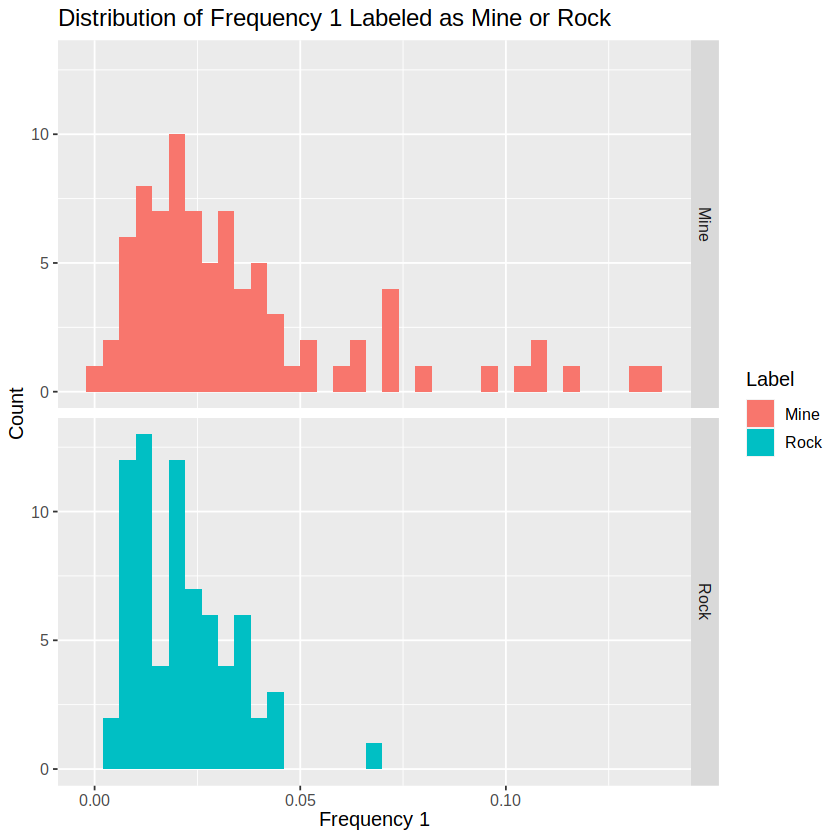

In [13]:
# Plotting a histogram of various frequencies to see what their distributions look like
# Plotting a histogram of every frequency would be very hard on our machine so we did a few frequencies
# The data never mentioned what the units for the energy represented by each frequency so we were not able to include those units

hist_1 <- ggplot(sonar_train, aes(x = Freq_1, fill = Label)) + 
          geom_histogram(position = "identity", binwidth = 0.004) + 
          labs(x = "Frequency 1", y = "Count", fill = "Label") +
          ggtitle("Distribution of Frequency 1 Labeled as Mine or Rock") +
          theme(text = element_text(size = 12)) +
          facet_grid(rows = vars(Label))
hist_1

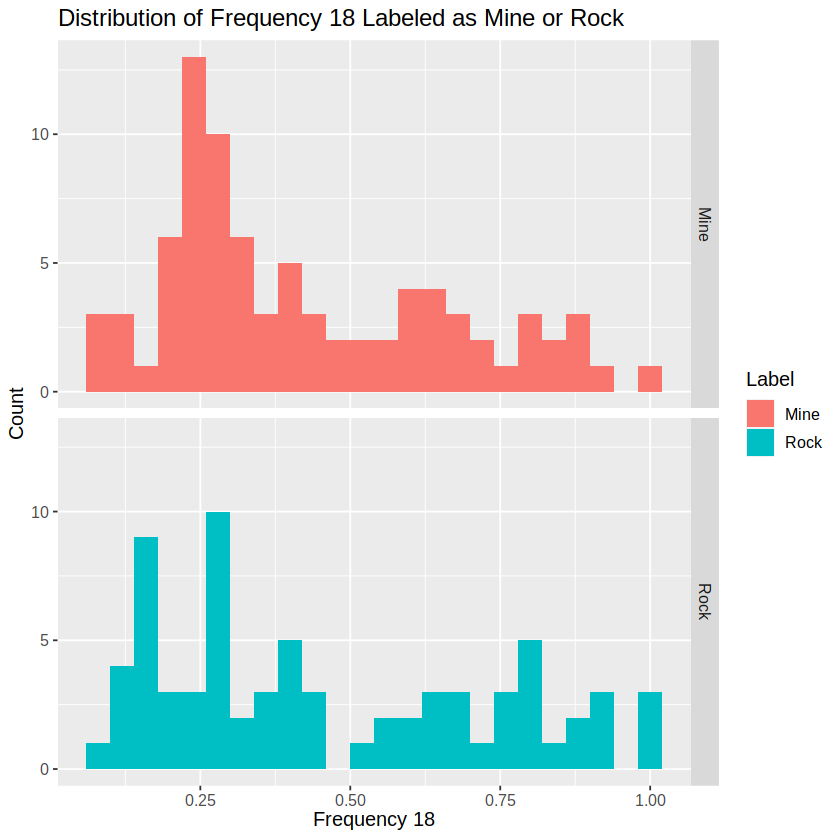

In [14]:
hist_18 <- ggplot(sonar_train, aes(x = Freq_18, fill = Label)) + 
           geom_histogram(position = "identity", binwidth = 0.04) + 
           labs(x = "Frequency 18", y = "Count", fill = "Label") +
           ggtitle("Distribution of Frequency 18 Labeled as Mine or Rock") +
           theme(text = element_text(size = 12)) +
           facet_grid(rows = vars(Label))
hist_18

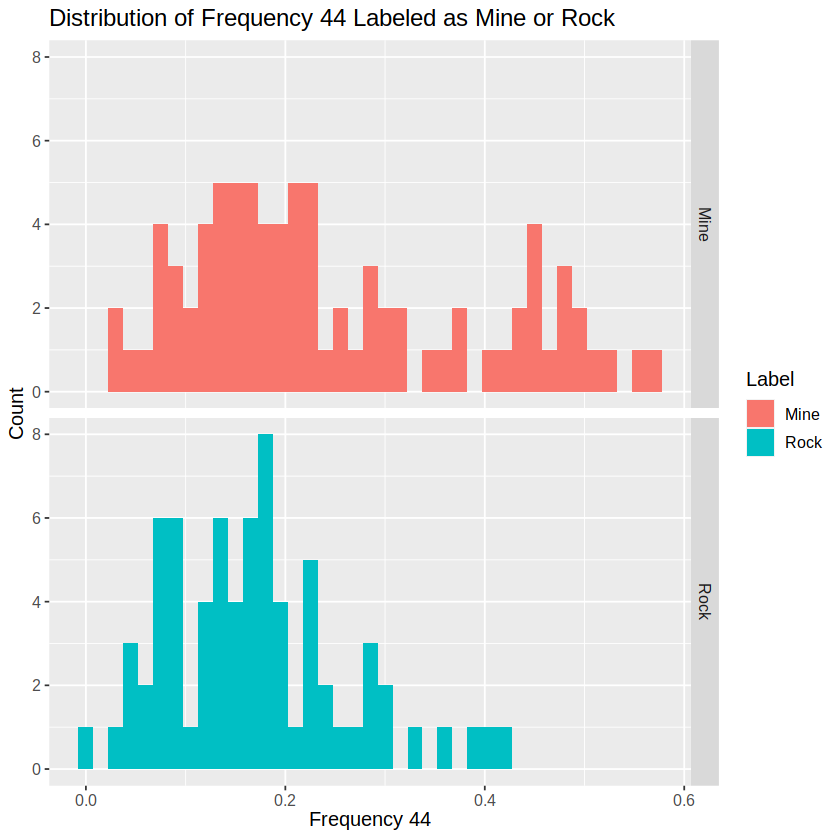

In [15]:
hist_44 <- ggplot(sonar_train, aes(x = Freq_44, fill = Label)) + 
           geom_histogram(position = "identity", binwidth = 0.015) + 
           labs(x = "Frequency 44", y = "Count", fill = "Label") +
           ggtitle("Distribution of Frequency 44 Labeled as Mine or Rock") +
           theme(text = element_text(size = 12)) +
           facet_grid(rows = vars(Label))
hist_44

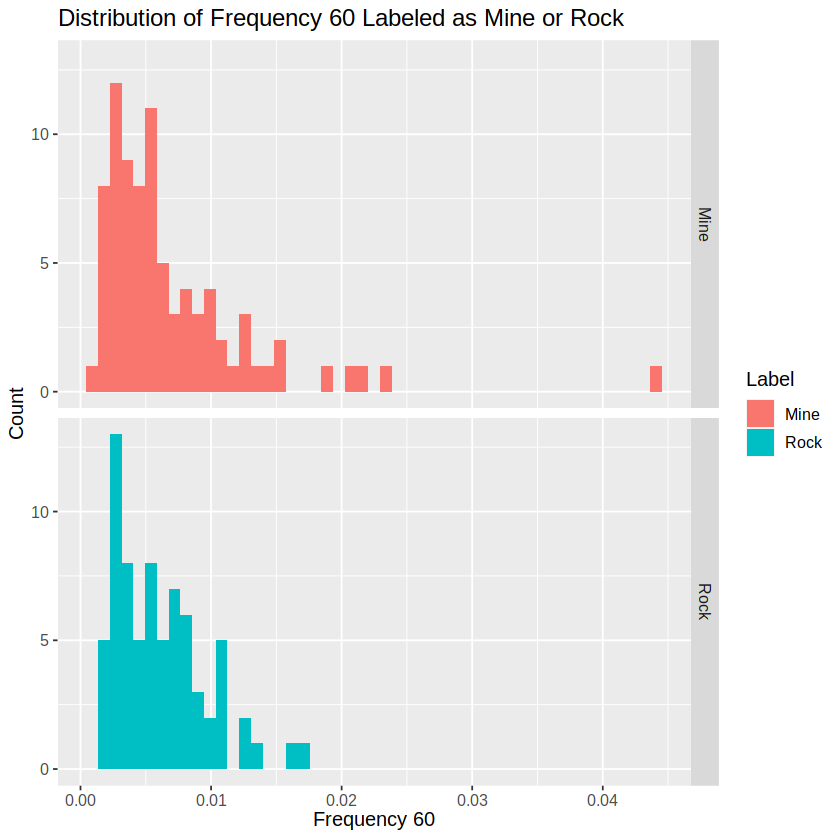

In [16]:
hist_60 <- ggplot(sonar_train, aes(x = Freq_60, fill = Label)) + 
           geom_histogram(position = "identity", binwidth = 0.0009) + 
           labs(x = "Frequency 60", y = "Count", fill = "Label") +
           ggtitle("Distribution of Frequency 60 Labeled as Mine or Rock") +
           theme(text = element_text(size = 12)) +
           facet_grid(rows = vars(Label))
hist_60

In [17]:
# Now we are going to create scatter plots with various frequencies to see if we can identify any groupings or patterns
# First, we have to scale our data for the scatter plot
# Then, we can create the scatter plot

sonar_train_recipe <- recipe(Label ~ ., data = sonar_train) |>
                      step_scale(all_predictors()) |>
                      step_center(all_predictors()) |>
                      prep()

scaled_sonar_train <- bake(sonar_train_recipe, sonar_train)

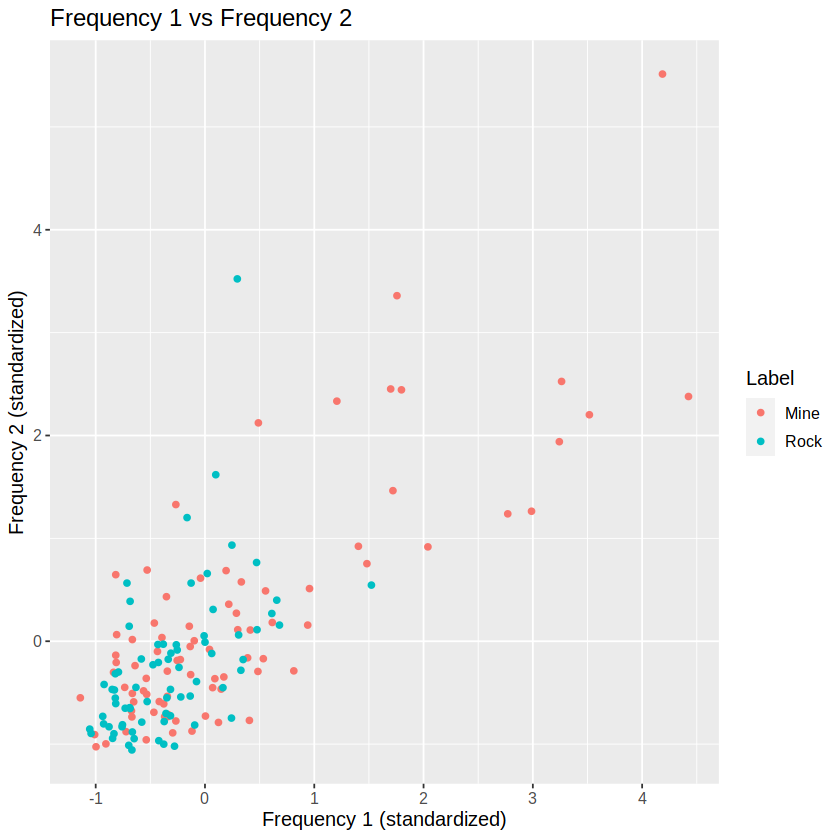

In [18]:
scatterplot_1_and_2 <- ggplot(scaled_sonar_train, aes(x = Freq_1, y = Freq_2, colour = Label)) + 
                       geom_point() +
                       labs(x = "Frequency 1 (standardized)", y = "Frequency 2 (standardized)") +
                       ggtitle("Frequency 1 vs Frequency 2") +
                       theme(text = element_text(size = 12))
                       
scatterplot_1_and_2

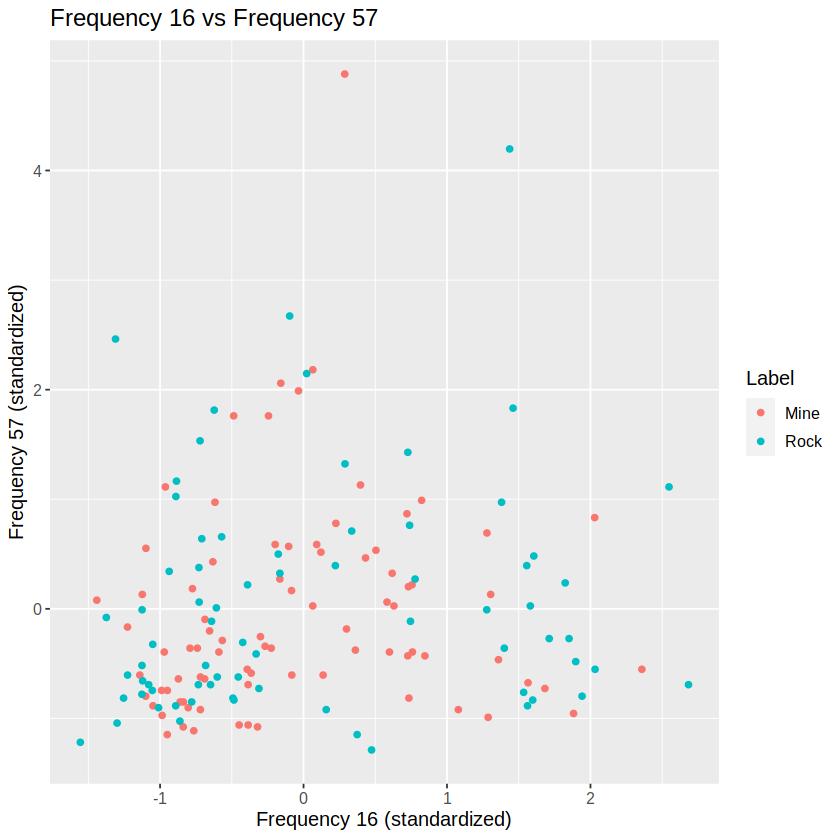

In [19]:
scatterplot_16_and_57 <- ggplot(scaled_sonar_train, aes(x = Freq_16, y = Freq_57, colour = Label)) + 
                         geom_point() +
                         labs(x = "Frequency 16 (standardized)", y = "Frequency 57 (standardized)") +
                         ggtitle("Frequency 16 vs Frequency 57") +
                         theme(text = element_text(size = 12))
                       
scatterplot_16_and_57

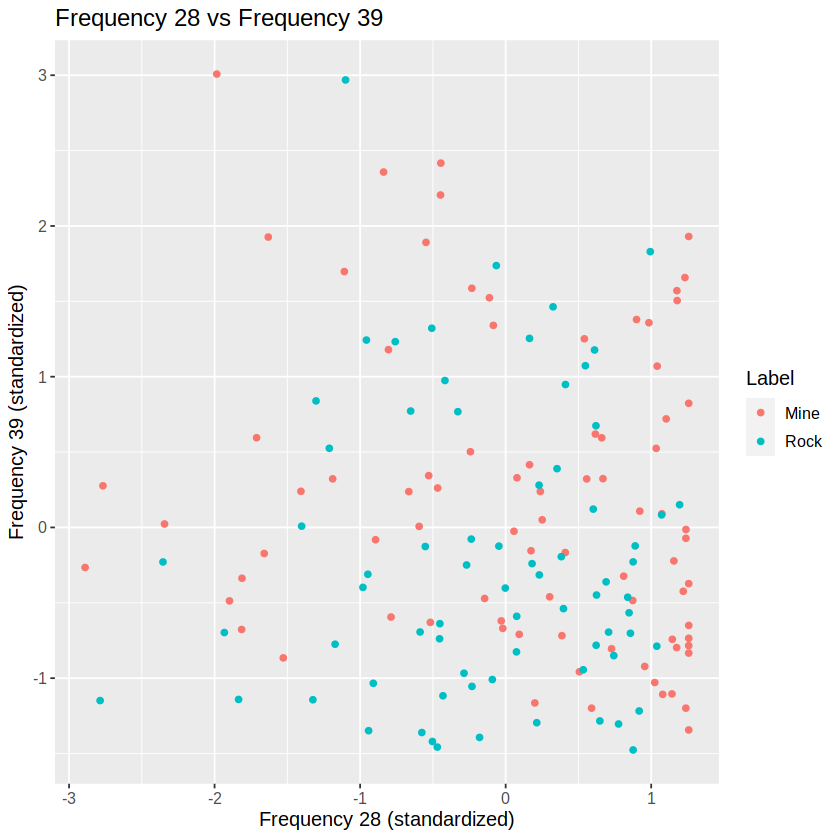

In [20]:
scatterplot_28_and_39 <- ggplot(scaled_sonar_train, aes(x = Freq_28, y = Freq_39, colour = Label)) + 
                         geom_point() +
                         labs(x = "Frequency 28 (standardized)", y = "Frequency 39 (standardized)") +
                         ggtitle("Frequency 28 vs Frequency 39") +
                         theme(text = element_text(size = 12))
                       
scatterplot_28_and_39

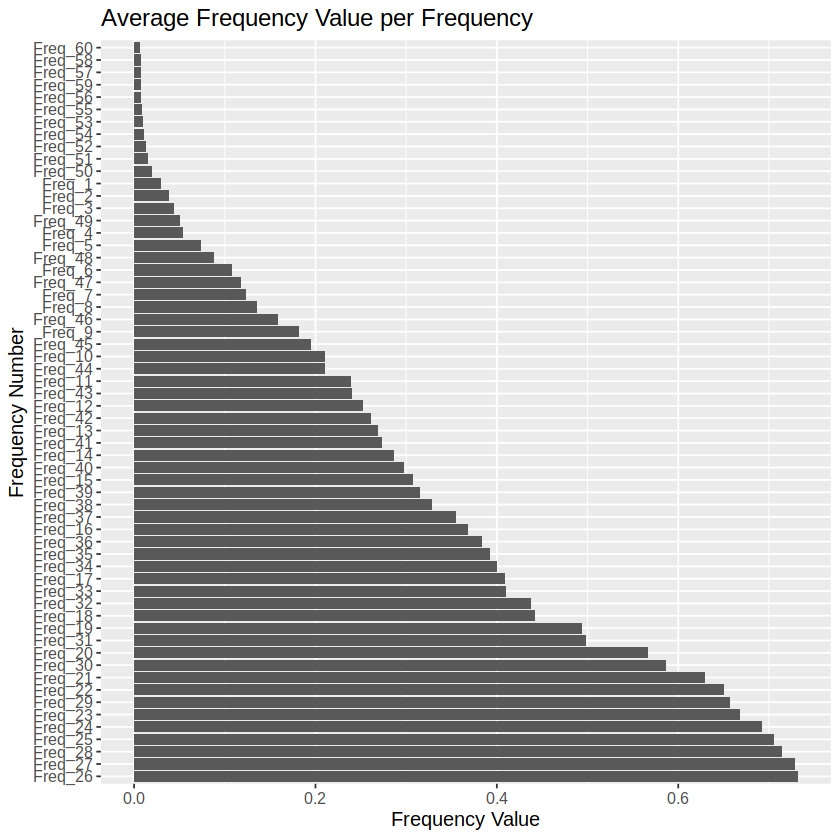

In [21]:
# This is a bar plot of the average frequency value of every frequency

freq_means_longer <- pivot_longer(freq_means_per_column, cols = Freq_1:Freq_60, names_to = "frequency_number", values_to = "frequency")

sonar_bar_mean <- ggplot(freq_means_longer, aes(x = frequency, y = fct_reorder(frequency_number, frequency, .desc = TRUE))) + 
                  geom_bar(stat = "identity") +
                  labs(x = "Frequency Value", y = "Frequency Number") +
                  ggtitle("Average Frequency Value per Frequency") +
                  theme(text = element_text(size = 12))
sonar_bar_mean

## Methods

In the given dataset, the energy of a particular frequency is graphed to find whether it is a rock or a mine. There are 60 frequencies with over 200 rows of data. We will be using all of the given values as they are equally relevant to our analysis. We cannot say that any frequency is irrelevant. The sequence of the 60 frequencies contributes to the classification rather than the individual frequency.  

We will be conducting KNN classification on our data to find the ideal number of K neighbours needed to accurately predict the class of any given value. Furthermore, we will be using these K-nearest neighbors to classify a new value of frequencies against minefields, as either a rock or mine. The data will be split into training and testing to ensure the model works across a variety of datasets. We will then use cross-validation to find the optimal value of K. Using the new value of K, we will be evaluating our testing data. The dataset will need to be scaled and standardized, eliminating the risk of any variable influencing the classification more than any other variable. Furthermore, we will consider accuracy as well as precision and recall of our predictors to account for the validity of our predictor class results.     
 
The most useful way for us to visualize the data is by creating a scatterplot and highlighting the K-nearest neighbors of a new value. This will allow us to visually decide whether any given data point is a rock or mine, support the results of a KNN classification, as well as visualize any trends and correlations between variables. 


## Expected Outcomes and Significance

Using our dataset, we are expecting to find the relationship between certain sonar frequencies and whether the object is a rock or a mine. A possible impact of our findings could be better mine detection technology in the future. Differentiating between rocks and mines will become easier for us and this type of technology may have huge military applications. With this, it also opens many questions in the future such as how can we differentiate between different types of mines we have spotted through these sonar frequencies or if there is a more efficient way of detecting mines.